<h1><center>IMT2230 Algebra Lineal Avanzada y Modelamiento</center></h1>
<h2><center>Proyecto 2</center></h2>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
def truncated_svd(A, k):
    U, S, Vh = np.linalg.svd(A, full_matrices=False)
    return U[:, :k], S[:k], Vh[:k]

In [34]:
A = np.load('/content/drive/MyDrive/data/data.npy')

# P1.

##### a. Realice la SVD de la matriz A, y úsela para proyectar las imagenes sobre el espacio lineal de dimensión k que mejor las aproxima. Use valores de k = 1, 5, 10, 25, 50 y 72. Elija un par de rostros, y para cada valor de k, muestre los “rostros aproximados”(correspondientes a las proyecciones) y compárelos con los originales.

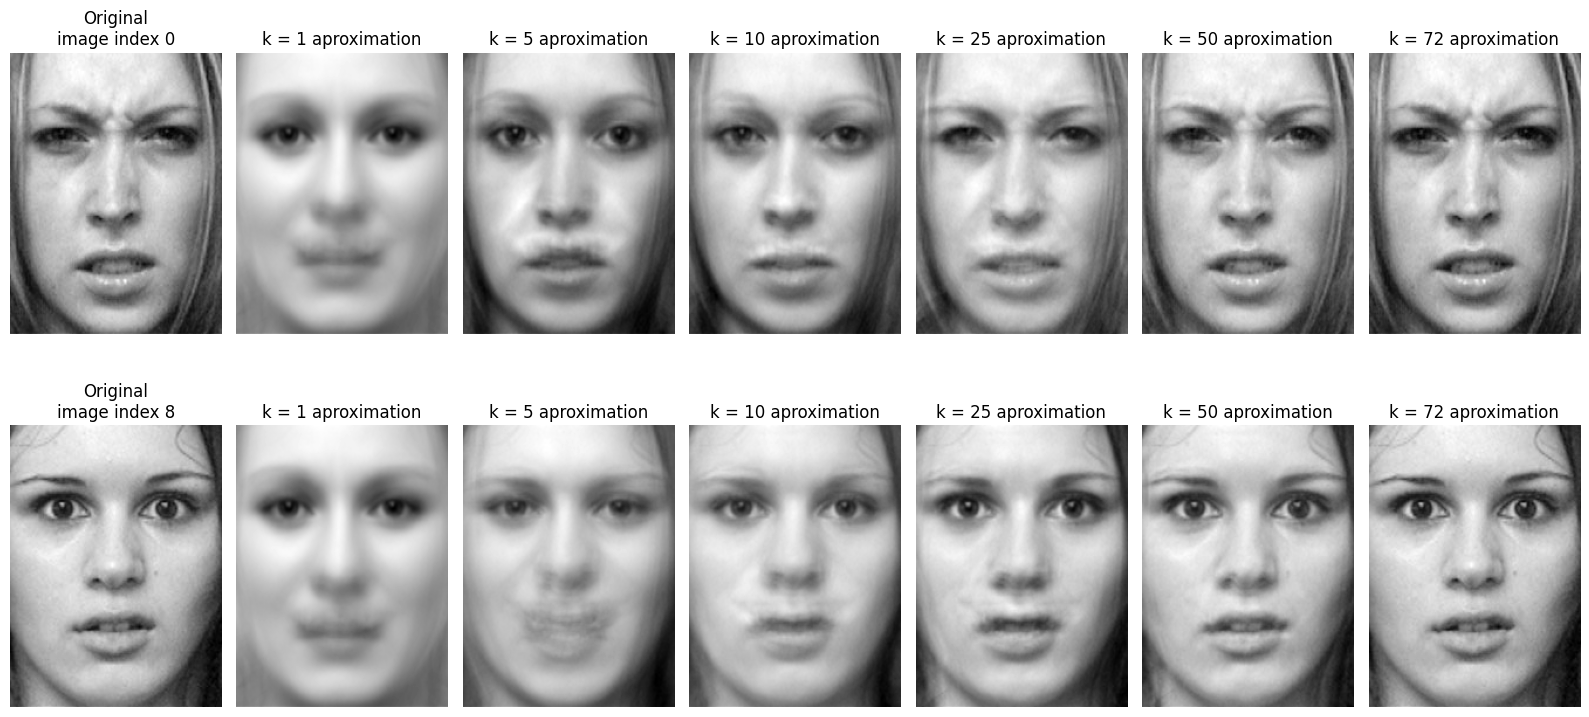

In [35]:
# Lista de los valores de la SVD
k_values = [1, 5, 10, 25, 50, 72]
num_k_values = len(k_values)

image_indices = [0, 8] # Indices de imagenes
num_images = len(image_indices)

fig, axes = plt.subplots(num_images, num_k_values + 1, figsize=(16, 8))

# Mostrar cada imagen original y sus aproximaciones:

for i, imagen in enumerate(image_indices):
    # Mostrar imagen original en la primera columna
    original_image = A[imagen].reshape((241, 181))
    axes[i, 0].imshow(original_image, cmap='gray')
    axes[i, 0].set_title(f'Original\nimage index {image_indices[i]}')
    axes[i, 0].axis('off')

    for j, k in enumerate(k_values):
        # SVD truncada
        U_k, S_k, Vh_k = truncated_svd(A, k)

        # Reconstrucción aproximada
        A_k = np.dot(U_k, np.dot(np.diag(S_k), Vh_k))
        approx_image = A_k[imagen].reshape((241, 181))

        # Mostrar la imagen aproximada en la columna j+1
        axes[i, j+1].imshow(approx_image, cmap='gray')
        axes[i, j+1].set_title(f'k = {k} aproximation')
        axes[i, j+1].axis('off')

# Ajustar el espacio entre plots para una mejor visualización
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/data/out.png")
plt.show()

##### b.  Realice PCA a la matriz A (es decir, el paso anterior pero centrando los datos previamente), y úsela para proyectar las imagenes sobre el espacio afin de dimensión k que mejor las aproxima. Use valores de k = 1, 5, 10, 25, 50 y 72. Nuevamente, para cada k, muestre un par de “rostros aproximados” y compárelos con los originales. Recuerde descentrar las imágenes una vez proyectadas.

In [36]:
mean_image = np.mean(A, axis=0)
A_centered = A - mean_image

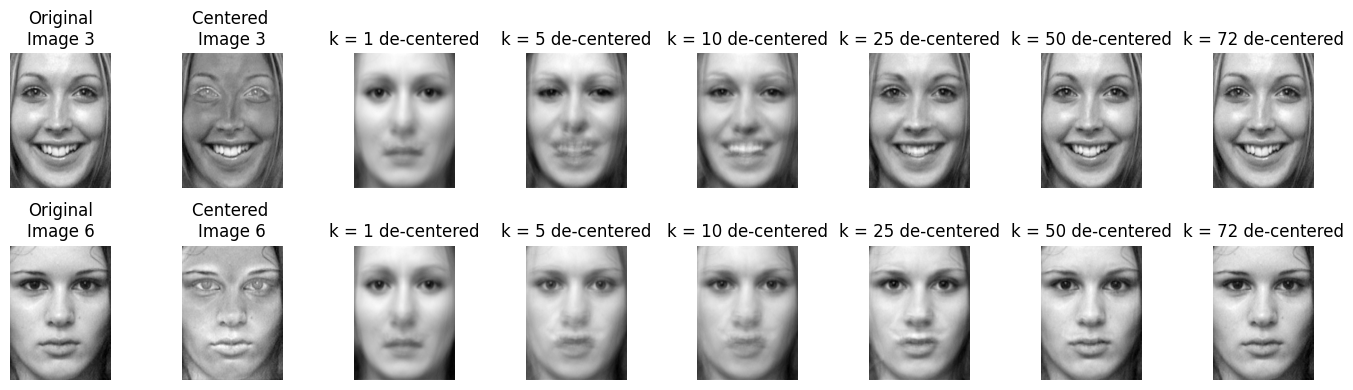

In [37]:
image_indices = [3, 6]
num_images = len(image_indices)

# Crear una figura con subplots
fig, axes = plt.subplots(num_images, num_k_values + 2, figsize=(2 * (num_k_values + 1), 2 * num_images))

for i, image_index in enumerate(image_indices):
    # mostrar la imagen original des-centrada
    original_image = A_centered[image_index].reshape((241, 181)) + mean_image.reshape((241, 181))
    axes[i, 0].imshow(original_image, cmap='gray')
    axes[i, 0].set_title(f'Original\nImage {image_indices[i]}')
    axes[i, 0].axis('off')

    # Mostrar imagen original
    original_image = A_centered[image_index].reshape((241, 181))
    axes[i, 1].imshow(original_image, cmap='gray')
    axes[i, 1].set_title(f'Centered \nImage {image_indices[i]}')
    axes[i, 1].axis('off')

    # Mostrar las imágenes aproximadas para cada valor de k
    for j, k in enumerate(k_values):
        # SVD truncada
        U_k, S_k, Vh_k = truncated_svd(A_centered, k)

        # reconstrucción aproximada y des-centrado
        A_k = np.dot(U_k, np.dot(np.diag(S_k), Vh_k))
        approx_image = A_k[image_index].reshape((241, 181)) + mean_image.reshape((241, 181))

        # Mostrar la imagen aproximada en la columna j+2
        axes[i, j+2].imshow(approx_image, cmap='gray')
        axes[i, j+2].set_title(f'k = {k} de-centered')
        axes[i, j+2].axis('off')

# Ajustar el espacio entre plots para una mejor visualización
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/data/PCA.png")
plt.show()

### c. **Muestre una tabla donde se compare el error cuadrático medio de las aproximaciones encontradas en los ítems anteriores (es decir, para los valores de k mencionados, y tanto para el caso centrado como el no centrado).**

Recuerde que este error está dado por la fórmula:

∥A(k) − A∥²ECM(A(k), A) = F/m


Donde A(k) contiene las proyecciones de las imágenes como filas, y m es la cantidad de imágenes.

**Comente.**


In [38]:
df_errores = pd.DataFrame(columns=["k", "ECM SVD", "ECM PCA sin descentrar", "ECM PCA descentrado"])

# m es el número de imágenes
m = A.shape[1]

# Calcular ECM para cada k
for k in k_values:
    # Realizar SVD truncado para A y A centrado
    U_k, S_k, Vh_k = truncated_svd(A, k)
    U_k_c, S_k_c, Vh_k_c = truncated_svd(A_centered, k)

    # Reconstruir las imágenes para el caso de SVD sin centrar, PCA sin descentrar y PCA centrado
    A_k_SVD = np.dot(U_k, np.dot(np.diag(S_k), Vh_k))
    A_k_PCA = np.dot(U_k_c, np.dot(np.diag(S_k_c), Vh_k_c))
    A_k_PCA_descentrado = A_k_PCA + mean_image.reshape((1, -1))  # repeat along a new axis
    ECM_SVD = np.linalg.norm(A_k_SVD - A, 'fro')**2 / m
    ECM_PCA = np.linalg.norm(A_k_PCA - A_centered, 'fro')**2 / m
    ECM_PCA_descentrado = np.linalg.norm(A_k_PCA_descentrado - A, 'fro')**2 / m

    df_errores.loc[len(df_errores)] = [k, ECM_SVD, ECM_PCA, ECM_PCA_descentrado]


df_errores['diff SVD y PCA'] = np.sqrt((df_errores['ECM SVD'] - df_errores['ECM PCA descentrado'])**2)
df_errores = df_errores.applymap(lambda x: round(x, 4))
df_errores

,k,ECM SVD,ECM PCA sin descentrar,ECM PCA descentrado,diff SVD y PCA
0,1.0,1.1527,0.9759,0.9759,0.1768
1,5.0,0.6011,0.5721,0.5721,0.0290
2,10.0,0.3892,0.3797,0.3797,0.0094
3,25.0,0.1561,0.1511,0.1511,0.0050
4,50.0,0.0395,0.0374,0.0374,0.0022
5,72.0,0.0000,0.0000,0.0000,0.0000


### d. Visualice los datos como puntos, proyectándolos en sus dos primeras componentes principales. Coloree los rostros correspondientes a una misma persona de un mismo color, y use colores distintos para rostros de personas distintas.Para mayor claridad, muestre los datos correspondientes a las dos primeras personas.



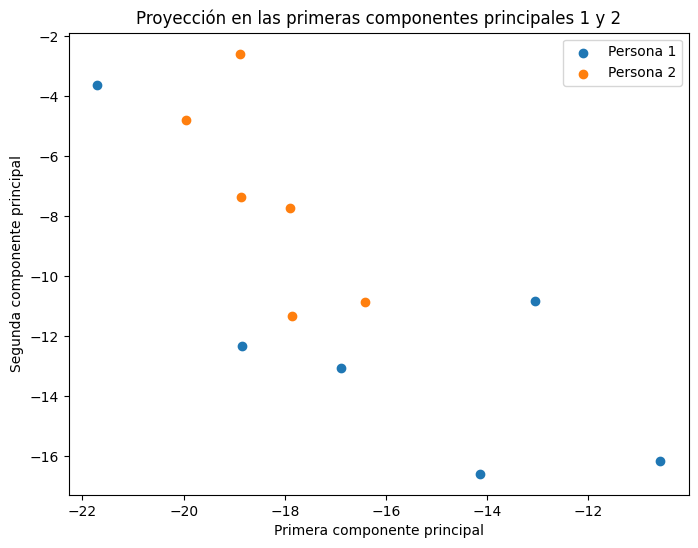

In [39]:
A_centered = A - np.mean(A, axis=0)
U, S, Vt = truncated_svd(A_centered, A.shape[0])
A_projected_1_2 = np.dot(A_centered, Vt.T[:, 0:2])

# Visualización de los datos proyectados
fig, ax = plt.subplots(figsize=(8, 6))

# Colorear los rostros correspondientes a una misma persona con un color y diferentes colores para personas distintas
for i in range(0, 2):
    ax.scatter(A_projected_1_2[i*6:i*6+6, 0], A_projected_1_2[i*6:i*6+6, 1], label=f'Persona {i+1}')

ax.set_xlabel('Primera componente principal')
ax.set_ylabel('Segunda componente principal')
ax.set_title('Proyección en las primeras componentes principales 1 y 2')
ax.legend()
plt.savefig("/content/drive/MyDrive/data/PCA12.png")
plt.show()


### e. Repita el paso anterior, proyectando ahora sobre la tercera y cuarta componentes principales. Comente. En particular, responda: ¿qué par de componentes (1 y 2 vs 3 y 4) parece ser más relevante para separar a las 2 primeras personas? ¿Cómo explica esto?

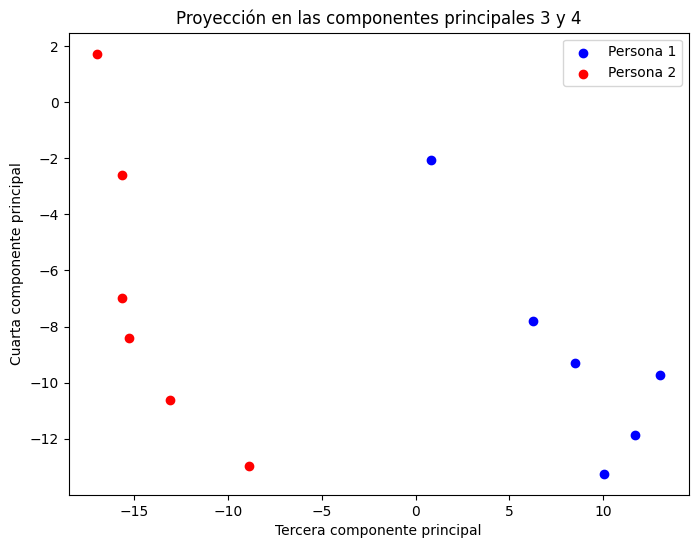

In [40]:
# Realizar PCA centrado a la matriz A
A_centered = A - np.mean(A, axis=0)
U, S, Vt = truncated_svd(A_centered, A.shape[0])

# Proyectar sobre las terceras y cuartas componentes principales
A_projected_3_4 = np.dot(A_centered, Vt.T[:, 2:4])

# Visualización de los datos proyectados en las dos primeras componentes principales
fig, ax = plt.subplots(figsize=(8, 6))

# Asignar colores a cada persona para una mejor visualización
colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink', 'brown', 'olive']
for i in range(0, 2):
    ax.scatter(A_projected_3_4[i*6:i*6+6, 0], A_projected_3_4[i*6:i*6+6, 1], c=colors[i], label=f'Persona {i+1}')

ax.set_xlabel('Tercera componente principal')
ax.set_ylabel('Cuarta componente principal')
ax.set_title('Proyección en las componentes principales 3 y 4')
ax.legend()

plt.savefig("/content/drive/MyDrive/data/PCA34.png")
plt.show()

### f. La matriz test.npy contiene seis imágenes, tres de ellas correspondientes a rostros y tres de ellas correspondientes a otros objetos cotidianos. Visualice las seis imágenes. Luego, aproxı́melas proyectandolas sobre las 20 primeras componentes principales (de la misma matriz A anterior con los 72 rostros), y visualice esta aproximación. Comente sobre la calidad de las aproximaciones obtenidas. ¿Que imagenes se aproximan bien sobre las componentes principales de A? ¿Porqué?

In [41]:
list_B = []

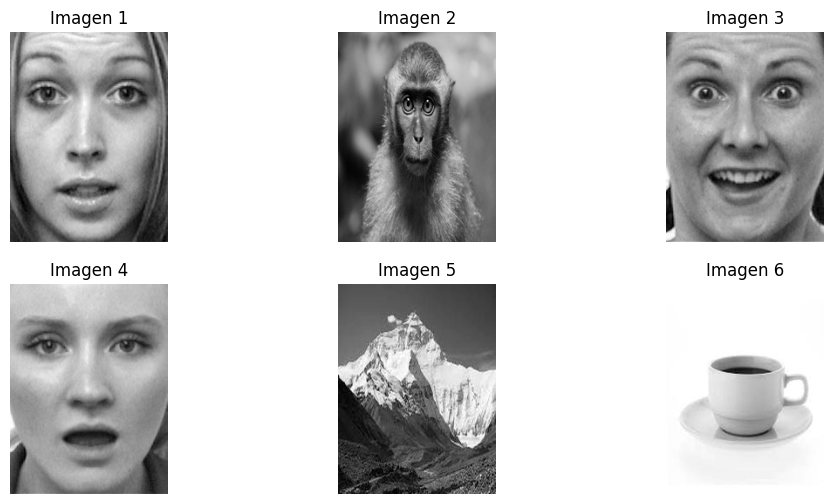

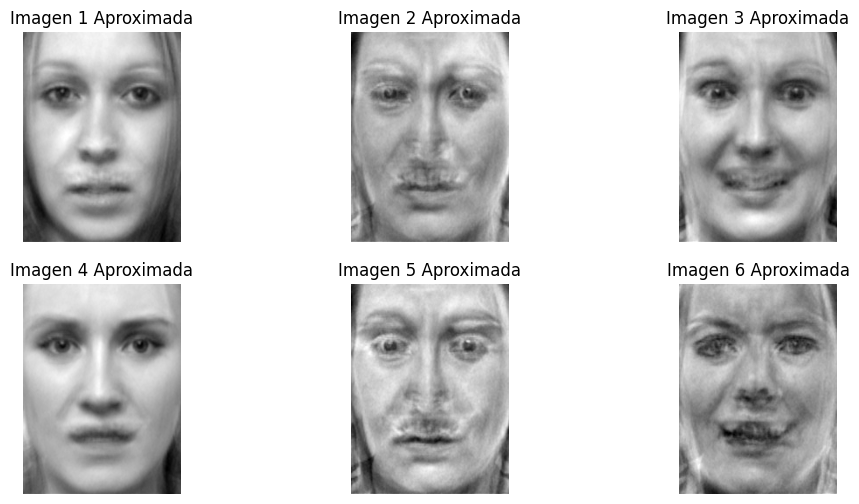

In [42]:
B = np.load("/content/drive/MyDrive/data/test.npy")

# Visualizar las seis imágenes
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    image_data = B[i].reshape((241, 181))  # swap the dimensions
    plt.imshow(image_data, cmap="gray")
    plt.title(f"Imagen {i + 1}")
    plt.axis('off')
plt.savefig("/content/drive/MyDrive/data/IMG.png")
plt.show()


# Realizar PCA a la matriz A
A_centered = A - np.mean(A, axis=0)

U_A, S_A, Vt_A = truncated_svd(A_centered, 20)

# Proyectar las imágenes de la matriz test.npy sobre las 20 primeras componentes principales de A
B_centered = B - np.mean(A, axis=0)
B_projected = np.dot(B_centered, Vt_A.T)

# Visualizar las aproximaciones de las seis imágenes
plt.figure(figsize=(12, 6))
for i in range(6):
    approx_image = np.dot(B_projected[i], Vt_A) + np.mean(A, axis=0)
    list_B.append(approx_image)
    approx_image = approx_image.reshape((241, 181))
    plt.subplot(2, 3, i + 1)
    plt.imshow(approx_image, cmap="gray")
    plt.title(f"Imagen {i + 1} Aproximada")
    plt.axis('off')
plt.savefig("/content/drive/MyDrive/data/Proy.png")
plt.show()


### g. Basado en el punto anterior, proponga un método que permita distinguir si una foto corresponde a un rostro o no (sólo se pide describirlo, no es necesario que lo implemente). Fundamente su propuesta.

In [43]:
# Respuesta en el informe

Parte 2:

a) Realice una exploración de los datos. En particular notará que hay varios valores Nan. ¿Cómo los interpretarı́a?

In [44]:
votes_b = pd.read_csv('/content/drive/MyDrive/data/votes.csv')

Debido que 1 (apruebo), -1 (rechazo) y 0 (abstencion), que en el contexto parlamentario significa que un diputado no ejercicio su derecho a vota, el valor ```NaN``` debe ser interpretado como voto blanco o nulo.

b) Reemplace los valores nulos, usando la segunda opción. Proyecte los datos (centrandolos previamente) sobre el subespacio de dimensión 2 que mejor los aproxime. Plotee los datos sobre este subespacio, coloreando cada punto de acuerdo a su partido polı́tico.

Para esta parte el valor NaN tomara el valor 0, ya que sabemos que la abstencion no aporta informacion a la eleccion (en este contexto), al igual que el voto blanco y el nulo.

In [45]:
# Agrupamos y generamos un dataframe con los valores de remplazo

party = votes_b["party"].T
prom = votes_b[votes_b.columns[1:1034]].mean().reset_index()
prom.rename(columns={"index": "Prop", 0: "Mean"}, inplace=True)
prom["Mean"] = pd.DataFrame(prom["Mean"]).applymap(lambda x: float(round(x)))
prom = prom.set_index("Prop")

In [46]:
# Funcion de remplazo

def apply_replace(df, df_replace):
  df = df.copy()
  df_columns = df[df.columns[1:1034]]
  for index, row in df.iterrows():
    for col_name in df_columns:
      if pd.isna(row[col_name]):
        df.at[index, col_name] = df_replace.T[col_name]
  return df

votes_b = apply_replace(votes_b, prom)

In [47]:
votes_b

,Diputado/a,38467,38468,38469,38474,38475,38476,38477,38478,38487,...,40434,40435,40436,40437,40438,40439,40440,40441,40442,party
0,"Ahumada Palma, Yovana",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,PDG
1,"Fuenzalida Cobo, Juan",1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,UDI
2,"Ossandón Irarrázabal, Ximena",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,RN
3,"Alessandri Vergara, Jorge",1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,UDI
4,"González Villarroel, Mauro",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,RN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,"Mix Jiménez, Claudia",0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,COM
150,"Ilabaca Cerda, Marcos",0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,PS
151,"Undurraga Gazitúa, Francisco",0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,EVO
152,"Hertz Cádiz, Carmen",0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,PC


In [48]:
X = votes_b[votes_b.columns[1:1034]]
Y = votes_b[votes_b.columns[1034]]

In [49]:
X_cen = X - X.mean() # Centramos los datos

In [50]:
U, S, Vh = truncated_svd(X_cen, 2)
proy_X_NaN0 = np.dot(X_cen, -Vh.T)
proy_df_NaN0 = pd.DataFrame(data=proy_X_NaN0, columns=['PCA1', 'PCA2'])
proy_df_NaN0['Party'] = Y


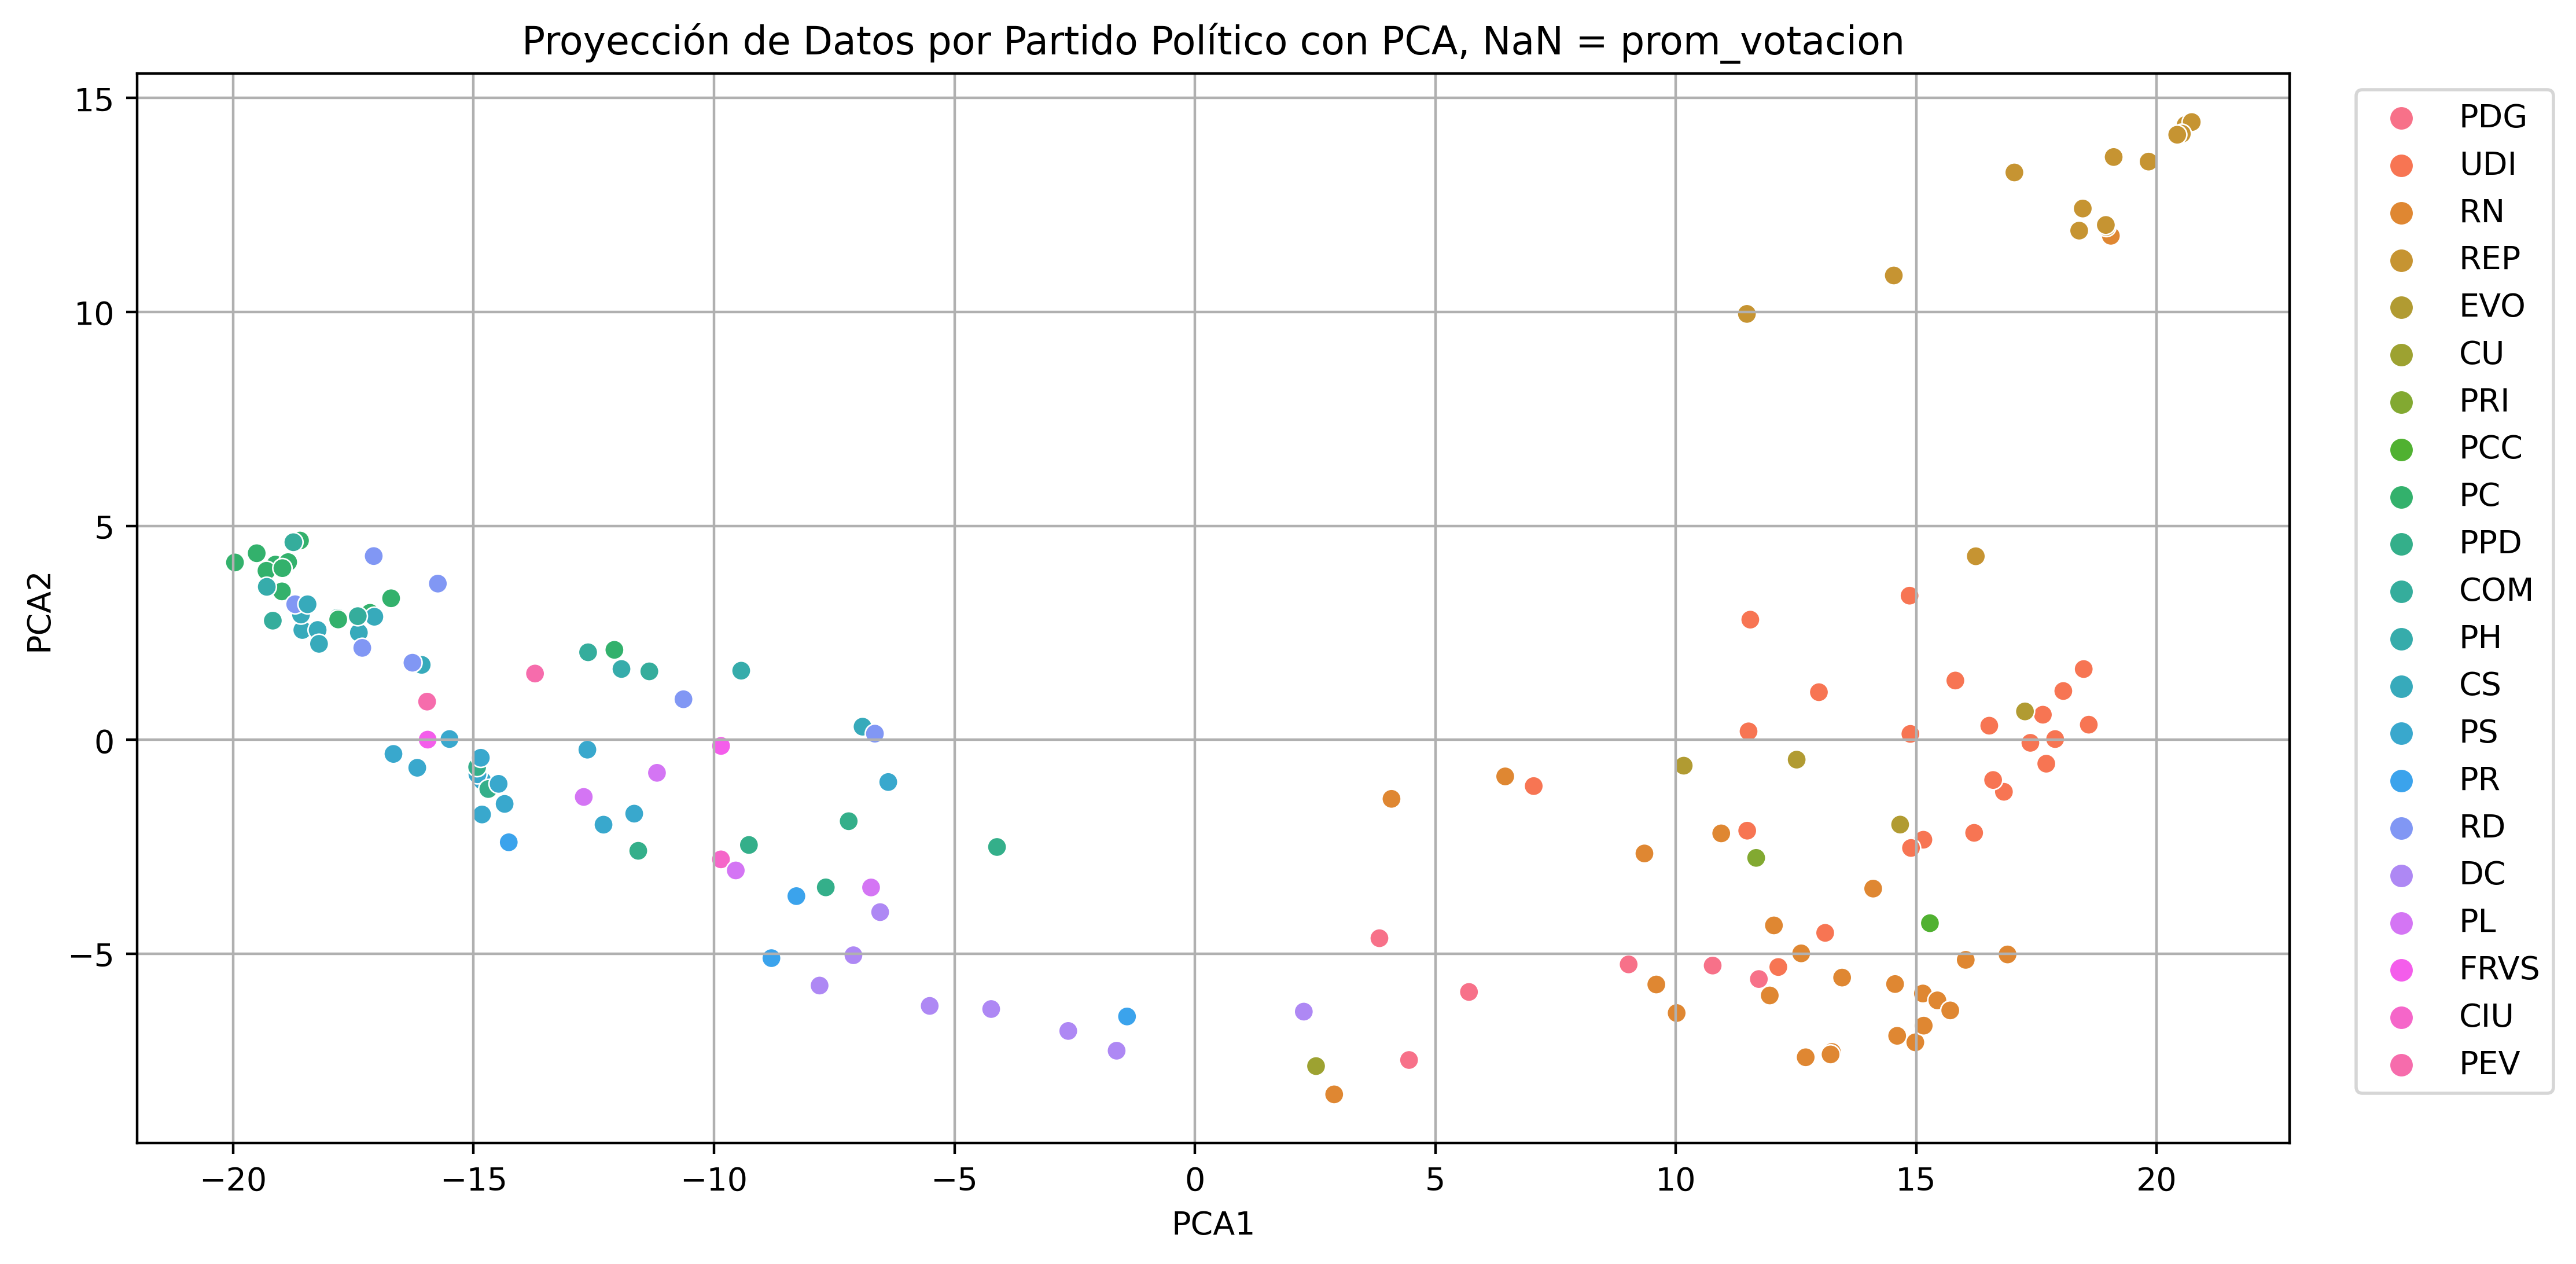

In [51]:
plt.figure(figsize=(12, 6), facecolor="White", dpi=400)
sns.scatterplot(data=proy_df_NaN0, x='PCA1', y='PCA2', hue='Party', palette='husl')
plt.title('Proyección de Datos por Partido Político con PCA, NaN = prom_votacion')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.13, 1))
plt.savefig("/content/drive/MyDrive/data/PCA_NAN0.png", bbox_inches='tight')
plt.show()

c)

In [52]:
votes_c = pd.read_csv('/content/drive/MyDrive/data/votes.csv')
votes_c

,Diputado/a,38467,38468,38469,38474,38475,38476,38477,38478,38487,...,40434,40435,40436,40437,40438,40439,40440,40441,40442,party
0,"Ahumada Palma, Yovana",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,PDG
1,"Fuenzalida Cobo, Juan",1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,UDI
2,"Ossandón Irarrázabal, Ximena",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,RN
3,"Alessandri Vergara, Jorge",1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,UDI
4,"González Villarroel, Mauro",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,RN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,"Mix Jiménez, Claudia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,COM
150,"Ilabaca Cerda, Marcos",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,PS
151,"Undurraga Gazitúa, Francisco",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,EVO
152,"Hertz Cádiz, Carmen",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC


In [53]:
# Agrupamos y generamos un dataframe con los valores de remplazo

vfp = votes_c[votes_c.columns[1:1035]]
vfp = vfp.groupby("party").mean().reset_index()
vfp[vfp.columns[1:]] = vfp[vfp.columns[1:]].applymap(lambda x: float(round(x)))

In [54]:
vfp

,party,38467,38468,38469,38474,38475,38476,38477,38478,38487,...,40433,40434,40435,40436,40437,40438,40439,40440,40441,40442
0,CIU,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,COM,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0
2,CS,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,CU,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,DC,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,EVO,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,FRVS,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,PC,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0
8,PCC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,PDG,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [55]:
# Funcion de remplazo

def apply_replace(df, df_replace):
  df = df.copy()
  df_columns = df.columns[1:1034]
  for index, row in df.iterrows():
    for col_name in df_columns:
      if pd.isna(row[col_name]):
        replace_col = df_replace[df_replace["party"] == row["party"]]
        df.loc[index, col_name] = replace_col.iloc[0][col_name]
  return df

In [56]:
votes_c = apply_replace(votes_c, vfp)

In [57]:
votes_c

,Diputado/a,38467,38468,38469,38474,38475,38476,38477,38478,38487,...,40434,40435,40436,40437,40438,40439,40440,40441,40442,party
0,"Ahumada Palma, Yovana",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,PDG
1,"Fuenzalida Cobo, Juan",1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,UDI
2,"Ossandón Irarrázabal, Ximena",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,RN
3,"Alessandri Vergara, Jorge",1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,UDI
4,"González Villarroel, Mauro",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,RN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,"Mix Jiménez, Claudia",-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,COM
150,"Ilabaca Cerda, Marcos",-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,PS
151,"Undurraga Gazitúa, Francisco",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,EVO
152,"Hertz Cádiz, Carmen",-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,PC


In [58]:
X_c = votes_c[votes_c.columns[1:1034]]
Y_c = votes_c[votes_c.columns[1034]]
#X_cen_c = (X_c - X_c.mean()) # Centramos los datos

U, S, Vh = truncated_svd(X_c, 2)
proy_X = (np.dot(X_c, -Vh.T))
proy_df = pd.DataFrame(data=proy_X, columns=['PCA1', 'PCA2'])
proy_df['Party'] = votes_c['party']


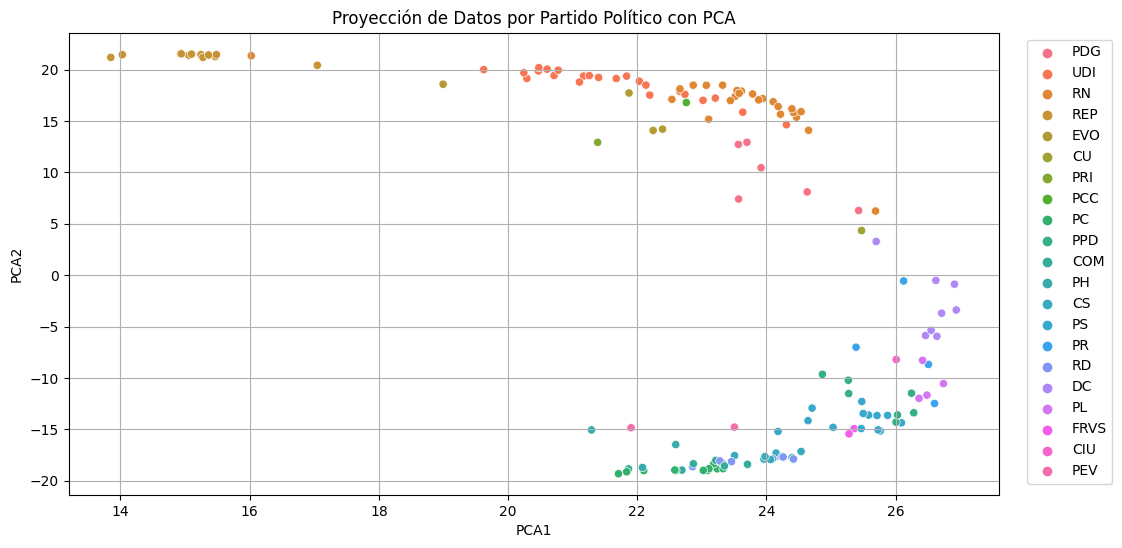

In [59]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=proy_df, x='PCA1', y='PCA2', hue='Party')
plt.title('Proyección de Datos por Partido Político con PCA')
plt.legend(loc='upper right', bbox_to_anchor=(1.13, 1))

plt.grid(True)
plt.savefig("/content/drive/MyDrive/data/PCA_SNaN_ncenter.png", bbox_inches='tight')
plt.show()

In [60]:
X_c = votes_c[votes_c.columns[1:1034]]
Y_c = votes_c[votes_c.columns[1034]]
X_cen_c = (X_c - X_c.mean()) # Centramos los datos

U, S, Vh = truncated_svd(X_cen_c, 2)
proy_X = (np.dot(X_cen_c, -Vh.T))
proy_df = pd.DataFrame(data=proy_X, columns=['PCA1', 'PCA2'])
proy_df['Party'] = votes_c['party']

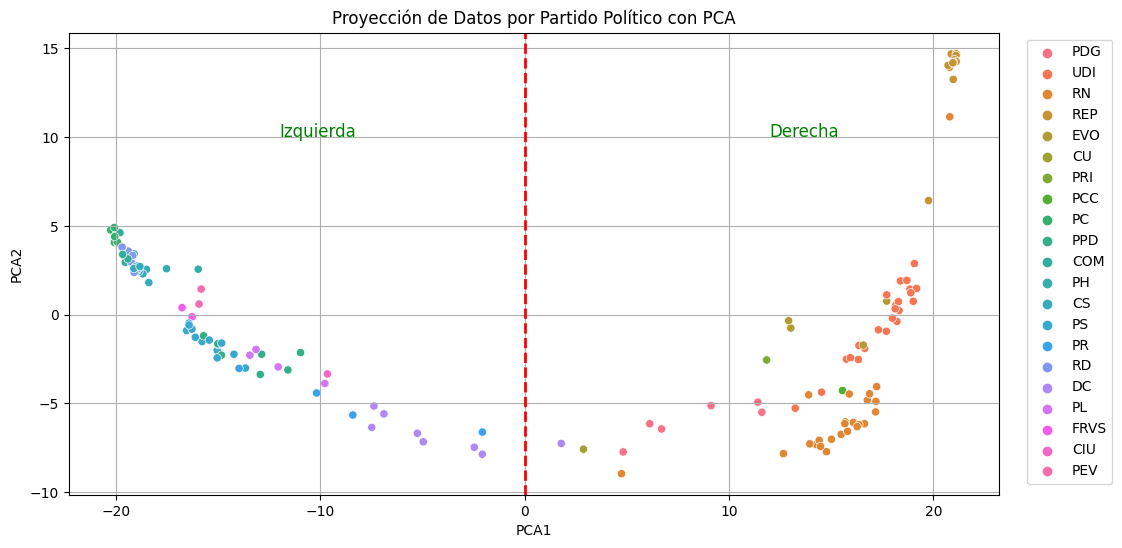

In [61]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=proy_df, x='PCA1', y='PCA2', hue='Party')
plt.title('Proyección de Datos por Partido Político con PCA')
plt.legend(loc='upper right', bbox_to_anchor=(1.13, 1))
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.text(-12, 10, 'Izquierda', fontsize=12, color='green')
plt.text(12, 10, 'Derecha', fontsize=12, color='green')
plt.grid(True)
plt.savefig("/content/drive/MyDrive/data/PCA_SNaN_sep.png", bbox_inches='tight')
plt.show()